## Uber для Sydney

Каждая строка представляет собой наблюдение за поездкой от одного места к другому с различными характеристиками поездки.

* **Origin Movement ID**: уникальный идентификатор начальной точки поездки.
* **Origin Display Name**: название начальной точки поездки.
* **Origin Geometry**  содержит геометрические данные (координаты) для точек происхождения или отправления. 
* **Destination Movement ID**: уникальный идентификатор конечной точки поездки.
* **Destination Display Name**: название конечной точки поездки.
* **Destination Geometry** обычно содержит геометрические данные (координаты) для точек прибытия или назначения поездки. 
* **Date Range**: диапазон дат, когда были совершены поездки.
* **Mean Travel Time (Seconds)**: среднее время поездки в секундах.
* **Range - Lower Bound Travel Time (Seconds)**: нижняя граница доверительного интервала для времени поездки.
* **Range - Upper Bound Travel Time (Seconds)**: верхняя граница доверительного интервала для времени поездки.

**Цель проекта**: Визуализировать на карте Sydney геометрические данные (координаты) отправки и  назначения поездки. Расчитать среднее значение расстояния, скорости поездки. Благодаря нашему проекту водители Uber в Sydney могут прогнозировать время путешествия на основе расстояния и средней скорости.

In [1]:
# Загрузка данных для Sydney
import pandas as pd
df = pd.read_csv('Updated Travel_Times - Sydney.csv')

# Просмотр первых 5 строк данных
df.head()


,Origin Movement ID,Origin Display Name,Origin Geometry,Destination Movement ID,Destination Display Name,Destination Geometry,Date Range,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
0,1844,Sydney - Haymarket - The Rocks (1844),"[[151.20528,-33.86874],[151.20604,-33.86868],[...",1349,Baulkham Hills (East) (1349),"[[150.98016,-33.75661],[150.98118,-33.75797],[...","07/31/2016 - 08/28/2016, Every day, Daily Average",1833,1431,2347
1,1844,Sydney - Haymarket - The Rocks (1844),"[[151.20528,-33.86874],[151.20604,-33.86868],[...",1350,Baulkham Hills (East) (1350),"[[150.98151,-33.76267],[150.98712,-33.76256],[...","07/31/2016 - 08/28/2016, Every day, Daily Average",1782,1374,2310
2,1844,Sydney - Haymarket - The Rocks (1844),"[[151.20528,-33.86874],[151.20604,-33.86868],[...",1351,Baulkham Hills (East) (1351),"[[150.99015,-33.75916],[150.98964,-33.75809],[...","07/31/2016 - 08/28/2016, Every day, Daily Average",1784,1341,2373
3,1844,Sydney - Haymarket - The Rocks (1844),"[[151.20528,-33.86874],[151.20604,-33.86868],[...",1353,Baulkham Hills (East) (1353),"[[150.9914,-33.76266],[150.99094,-33.76218],[1...","07/31/2016 - 08/28/2016, Every day, Daily Average",1906,1553,2339
4,1844,Sydney - Haymarket - The Rocks (1844),"[[151.20528,-33.86874],[151.20604,-33.86868],[...",1357,Baulkham Hills (West) - Bella Vista (1357),"[[150.9562,-33.7573],[150.95862,-33.75413],[15...","07/31/2016 - 08/28/2016, Every day, Daily Average",1974,1560,2497


In [2]:
df.tail()

,Origin Movement ID,Origin Display Name,Origin Geometry,Destination Movement ID,Destination Display Name,Destination Geometry,Date Range,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
501,1844,Sydney - Haymarket - The Rocks (1844),"[[151.20528,-33.86874],[151.20604,-33.86868],[...",3558,Caringbah - Lilli Pilli (3558),"[[151.12013,-34.02833],[151.12092,-34.0243],[1...","07/31/2016 - 08/28/2016, Every day, Daily Average",1864,1511,2298
502,1844,Sydney - Haymarket - The Rocks (1844),"[[151.20528,-33.86874],[151.20604,-33.86868],[...",3582,Miranda - Yowie Bay (3582),"[[151.1055,-34.0299],[151.1143,-34.03114],[151...","07/31/2016 - 08/28/2016, Every day, Daily Average",2258,1739,2930
503,1844,Sydney - Haymarket - The Rocks (1844),"[[151.20528,-33.86874],[151.20604,-33.86868],[...",3584,Miranda - Yowie Bay (3584),"[[151.10691,-34.02413],[151.10878,-34.02446],[...","07/31/2016 - 08/28/2016, Every day, Daily Average",1951,1479,2572
504,1844,Sydney - Haymarket - The Rocks (1844),"[[151.20528,-33.86874],[151.20604,-33.86868],[...",3589,Sylvania - Taren Point (3589),"[[151.12092,-34.0243],[151.11792,-34.02377],[1...","07/31/2016 - 08/28/2016, Every day, Daily Average",1869,1434,2434
505,1844,Sydney - Haymarket - The Rocks (1844),"[[151.20528,-33.86874],[151.20604,-33.86868],[...",3590,Sylvania - Taren Point (3590),"[[151.12668,-34.02605],[151.12684,-34.02515],[...","07/31/2016 - 08/28/2016, Every day, Daily Average",1910,1466,2488


Так как в столбце Date Range содержится одинаковая информация 07/31/2016 - 08/28/2016, Every day, Daily Average. Мы его удаляем.

In [3]:
df = df.drop(columns=['Date Range'])


Проверяем содержимое столбцов 'Origin Geometry' и 'Destination Geometry'

В этом коде мы определяем две функции: is_valid_json и convert_coords, и используем их для преобразования значений столбцов 'Origin Geometry' и 'Destination Geometry' в новом DataFrame.

Функция is_valid_json проверяет, является ли переданная строка json_str валидным JSON-объектом. Она использует json.loads для попытки разбора строки в формате JSON. Если разбор проходит успешно, функция возвращает True, в противном случае - False.

Функция convert_coords принимает значение coords (координаты) и проверяет, является ли это значение строкой и валидным JSON. Если это так, функция парсит строку JSON в список координат и создает объекты Point из каждой координаты, используя модуль shapely.geometry.Point. Если значение coords не является строкой или не является валидным JSON, функция возвращает None.

Затем мы создаем новый DataFrame new_df и применяем функцию convert_coords к столбцам 'Origin Geometry' и 'Destination Geometry' в исходном DataFrame df с помощью метода .apply. Результаты преобразования сохраняются в соответствующих столбцах new_df.

Новый DataFrame new_df содержит преобразованные значения столбцов 'Origin Geometry' и 'Destination Geometry', где каждое значение является списком объектов Point. Мы выводим этот новый DataFrame для просмотра и проверки результатов преобразования.

In [4]:
import pandas as pd
from shapely.geometry import Point
import json

def is_valid_json(json_str):
    try:
        json.loads(json_str)
        return True
    except ValueError:
        return False

def convert_coords(coords):
    if isinstance(coords, str) and is_valid_json(coords):
        coordinates = json.loads(coords)
        return [Point(coord[0], coord[1]) for coord in coordinates]
    else:
        return None

# Создаем новый DataFrame с преобразованными значениями столбцов
new_df = pd.DataFrame()
new_df['Origin Geometry'] = df['Origin Geometry'].apply(convert_coords)
new_df['Destination Geometry'] = df['Destination Geometry'].apply(convert_coords)

# Выводим новый DataFrame
print(new_df)


                                       Origin Geometry  \
0    [POINT (151.20528 -33.86874), POINT (151.20604...   
1    [POINT (151.20528 -33.86874), POINT (151.20604...   
2    [POINT (151.20528 -33.86874), POINT (151.20604...   
3    [POINT (151.20528 -33.86874), POINT (151.20604...   
4    [POINT (151.20528 -33.86874), POINT (151.20604...   
..                                                 ...   
501  [POINT (151.20528 -33.86874), POINT (151.20604...   
502  [POINT (151.20528 -33.86874), POINT (151.20604...   
503  [POINT (151.20528 -33.86874), POINT (151.20604...   
504  [POINT (151.20528 -33.86874), POINT (151.20604...   
505  [POINT (151.20528 -33.86874), POINT (151.20604...   

                                  Destination Geometry  
0    [POINT (150.98016 -33.75661), POINT (150.98118...  
1    [POINT (150.98151 -33.76267), POINT (150.98712...  
2    [POINT (150.99015 -33.75916), POINT (150.98964...  
3    [POINT (150.9914 -33.76266), POINT (150.99094 ...  
4    [POINT (150.9

В новом DataFrame new_df каждое значение в столбцах 'Origin Geometry' и 'Destination Geometry' представлено списком объектов Point. Каждый объект Point содержит координаты точки в формате (долгота, широта).

In [5]:


# Посмотрите на общую информацию о данных
print(df.info())

# Описательная статистика
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Origin Movement ID                         506 non-null    int64 
 1   Origin Display Name                        506 non-null    object
 2   Origin Geometry                            506 non-null    object
 3   Destination Movement ID                    506 non-null    int64 
 4   Destination Display Name                   506 non-null    object
 5   Destination Geometry                       506 non-null    object
 6   Mean Travel Time (Seconds)                 506 non-null    int64 
 7   Range - Lower Bound Travel Time (Seconds)  506 non-null    int64 
 8   Range - Upper Bound Travel Time (Seconds)  506 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 35.7+ KB
None
       Origin Movement ID  Destination Movement ID  \
count

Это подробная информация о вашем датасете. Она показывает количество значений, которые не являются пустыми (Non-Null Count), для каждого столбца, и также дает общую статистическую информацию (среднее значение, стандартное отклонение, минимум, максимум и квартили) для каждого столбца, содержащего числовые данные.

In [6]:
correlation_matrix = df.corr()
print(correlation_matrix)


                                           Origin Movement ID  \
Origin Movement ID                                        NaN   
Destination Movement ID                                   NaN   
Mean Travel Time (Seconds)                                NaN   
Range - Lower Bound Travel Time (Seconds)                 NaN   
Range - Upper Bound Travel Time (Seconds)                 NaN   

                                           Destination Movement ID  \
Origin Movement ID                                             NaN   
Destination Movement ID                                   1.000000   
Mean Travel Time (Seconds)                                0.124425   
Range - Lower Bound Travel Time (Seconds)                 0.120961   
Range - Upper Bound Travel Time (Seconds)                 0.124746   

                                           Mean Travel Time (Seconds)  \
Origin Movement ID                                                NaN   
Destination Movement ID                   

C:\Users\Ольга\AppData\Local\Temp\ipykernel_8532\1752422992.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [7]:
df = df.drop('Origin Movement ID', axis=1)


In [8]:
correlation_matrix = df.corr()
print(correlation_matrix)

                                           Destination Movement ID  \
Destination Movement ID                                   1.000000   
Mean Travel Time (Seconds)                                0.124425   
Range - Lower Bound Travel Time (Seconds)                 0.120961   
Range - Upper Bound Travel Time (Seconds)                 0.124746   

                                           Mean Travel Time (Seconds)  \
Destination Movement ID                                      0.124425   
Mean Travel Time (Seconds)                                   1.000000   
Range - Lower Bound Travel Time (Seconds)                    0.991075   
Range - Upper Bound Travel Time (Seconds)                    0.987650   

                                           Range - Lower Bound Travel Time (Seconds)  \
Destination Movement ID                                                     0.120961   
Mean Travel Time (Seconds)                                                  0.991075   
Range - Lower Bound

C:\Users\Ольга\AppData\Local\Temp\ipykernel_8532\2020863294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Высокая корреляция между независимыми переменными может вызвать проблемы мультиколлинеарности в регрессионных моделях. Мультиколлинеарность может сделать оценки коэффициентов регрессии нестабильными и трудными для интерпретации. Поэтому Range - Lower Bound Travel Time (Seconds), Range - Upper Bound Travel Time (Seconds)  удаляем.  "Destination Movement ID" имеет слабую корреляцию с другими числовыми столбцами. Это может означать, что это может не быть сильным предиктором для "Mean Travel Time (Seconds)". Так же удаляем "Destination Movement ID"

In [9]:
df = df.drop(['Range - Lower Bound Travel Time (Seconds)', 'Range - Upper Bound Travel Time (Seconds)', 'Destination Movement ID'], axis=1)


Файл World_Cities.shp с геометрией Сиднея, брала на сайте Efrain maps https://www.efrainmaps.es/english-version/free-downloads/world/

In [10]:
df.head()

,Origin Display Name,Origin Geometry,Destination Display Name,Destination Geometry,Mean Travel Time (Seconds)
0,Sydney - Haymarket - The Rocks (1844),"[[151.20528,-33.86874],[151.20604,-33.86868],[...",Baulkham Hills (East) (1349),"[[150.98016,-33.75661],[150.98118,-33.75797],[...",1833
1,Sydney - Haymarket - The Rocks (1844),"[[151.20528,-33.86874],[151.20604,-33.86868],[...",Baulkham Hills (East) (1350),"[[150.98151,-33.76267],[150.98712,-33.76256],[...",1782
2,Sydney - Haymarket - The Rocks (1844),"[[151.20528,-33.86874],[151.20604,-33.86868],[...",Baulkham Hills (East) (1351),"[[150.99015,-33.75916],[150.98964,-33.75809],[...",1784
3,Sydney - Haymarket - The Rocks (1844),"[[151.20528,-33.86874],[151.20604,-33.86868],[...",Baulkham Hills (East) (1353),"[[150.9914,-33.76266],[150.99094,-33.76218],[1...",1906
4,Sydney - Haymarket - The Rocks (1844),"[[151.20528,-33.86874],[151.20604,-33.86868],[...",Baulkham Hills (West) - Bella Vista (1357),"[[150.9562,-33.7573],[150.95862,-33.75413],[15...",1974


In [11]:
print(df.memory_usage())
df.info()


Index                          128
Origin Display Name           4048
Origin Geometry               4048
Destination Display Name      4048
Destination Geometry          4048
Mean Travel Time (Seconds)    4048
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Origin Display Name         506 non-null    object
 1   Origin Geometry             506 non-null    object
 2   Destination Display Name    506 non-null    object
 3   Destination Geometry        506 non-null    object
 4   Mean Travel Time (Seconds)  506 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 19.9+ KB


Origin Display Name: название начальной точки поездки. Destination Display Name: название конечной точки поездки. Origin Geometry уникальный идентификатор начальной точки поездки Destination Geometry обычно содержит геометрические данные (координаты) для точек прибытия или назначения поездки. Так как они дублируют друг друга, мы удалим Origin Display Name, Destination Display Name

In [12]:
df = df.drop(['Origin Display Name', 'Destination Display Name'], axis=1)

In [13]:
print(df.memory_usage())
df.info()


Index                          128
Origin Geometry               4048
Destination Geometry          4048
Mean Travel Time (Seconds)    4048
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Origin Geometry             506 non-null    object
 1   Destination Geometry        506 non-null    object
 2   Mean Travel Time (Seconds)  506 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.0+ KB


In [14]:
print(new_df['Origin Geometry'])

0      [POINT (151.20528 -33.86874), POINT (151.20604...
1      [POINT (151.20528 -33.86874), POINT (151.20604...
2      [POINT (151.20528 -33.86874), POINT (151.20604...
3      [POINT (151.20528 -33.86874), POINT (151.20604...
4      [POINT (151.20528 -33.86874), POINT (151.20604...
                             ...                        
501    [POINT (151.20528 -33.86874), POINT (151.20604...
502    [POINT (151.20528 -33.86874), POINT (151.20604...
503    [POINT (151.20528 -33.86874), POINT (151.20604...
504    [POINT (151.20528 -33.86874), POINT (151.20604...
505    [POINT (151.20528 -33.86874), POINT (151.20604...
Name: Origin Geometry, Length: 506, dtype: object


In [15]:
print(new_df.loc[0, 'Origin Geometry'])


[<POINT (151.205 -33.869)>, <POINT (151.206 -33.869)>, <POINT (151.206 -33.871)>, <POINT (151.206 -33.871)>, <POINT (151.205 -33.869)>]


Так как у нас нет информации о датасете. В каждой строчке new_df Origin Geometry 5 разных точек. Возможно, в данных присутствует информация о разных точках отправки такси, которые расположены в одном месте или вблизи друг друга.

In [16]:
import geopandas as gpd

# Загрузка файла World_Cities.shp
world_cities = gpd.read_file('World_Cities.shp')

# Фильтрация города Sydney
sydney = world_cities[world_cities['NAME'] == 'Sydney']

# Проверка наличия города Sydney
if not sydney.empty:
    print("Город Sydney найден в файле World_Cities.shp.")
    print(sydney)
else:
    print("Город Sydney не найден в файле World_Cities.shp.")


Город Sydney найден в файле World_Cities.shp.
       NAME    COUNTRY CAPITAL                     geometry
292  Sydney  Australia       N  POINT (151.02820 -33.88977)


В предоставленном коде мы используем библиотеку geopandas для работы с географическими данными в формате шейп-файлов.

1. geopandas: Это библиотека, которая расширяет функциональность библиотеки pandas для работы с геопространственными данными. Она предоставляет возможности для чтения, записи, анализа и визуализации географических данных.

В этом коде мы загружаем файл World_Cities.shp, содержащий информацию о городах мира, с помощью функции gpd.read_file(). Затем мы фильтруем этот DataFrame, чтобы найти город Sydney, используя условие world_cities['NAME'] == 'Sydney'. Если город Sydney найден, мы выводим информацию о нем, иначе выводим сообщение о том, что город Sydney не найден.

Используя geopandas, мы можем выполнять различные операции с географическими данными, включая загрузку, фильтрацию, пространственные запросы и визуализацию.

В предоставленном коде мы использовали следующие библиотеки:

1. folium: Это библиотека для создания интерактивных карт и визуализации географических данных.
2. time: Это встроенная библиотека Python для работы со временем и измерения времени выполнения операций.
3. shapely.geometry: Это библиотека для работы с геометрическими объектами, такими как точки, линии, полигоны и многое другое.

В этом коде мы создаем карту города Sydney с использованием folium.Map. Затем мы добавляем маркеры на карту для каждой точки происхождения и точки назначения, используя столбцы Origin Geometry и Destination Geometry из нашего DataFrame. Для этого мы перебираем списки точек в каждом столбце и добавляем маркеры на карту с помощью folium.Marker. Маркеры происхождения обозначены красным цветом, а маркеры назначения - синим цветом.

В этом коде мы создаем карту города Sydney с использованием folium.Map. Затем мы добавляем маркеры на карту для каждой точки происхождения и точки назначения, используя столбцы Origin Geometry и Destination Geometry из нашего DataFrame. Для этого мы перебираем списки точек в каждом столбце и добавляем маркеры на карту с помощью folium.Marker. Маркеры происхождения обозначены красным цветом, а маркеры назначения - синим цветом.

Используемые библиотеки позволяют нам работать с географическими данными, создавать интерактивные карты и визуализировать данные на них.

In [17]:
new_df['Mean Travel Time (Seconds)'] = df['Mean Travel Time (Seconds)']



In [18]:
print(new_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Origin Geometry             506 non-null    object
 1   Destination Geometry        506 non-null    object
 2   Mean Travel Time (Seconds)  506 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.0+ KB
None


In [19]:
print(new_df)


                                       Origin Geometry  \
0    [POINT (151.20528 -33.86874), POINT (151.20604...   
1    [POINT (151.20528 -33.86874), POINT (151.20604...   
2    [POINT (151.20528 -33.86874), POINT (151.20604...   
3    [POINT (151.20528 -33.86874), POINT (151.20604...   
4    [POINT (151.20528 -33.86874), POINT (151.20604...   
..                                                 ...   
501  [POINT (151.20528 -33.86874), POINT (151.20604...   
502  [POINT (151.20528 -33.86874), POINT (151.20604...   
503  [POINT (151.20528 -33.86874), POINT (151.20604...   
504  [POINT (151.20528 -33.86874), POINT (151.20604...   
505  [POINT (151.20528 -33.86874), POINT (151.20604...   

                                  Destination Geometry  \
0    [POINT (150.98016 -33.75661), POINT (150.98118...   
1    [POINT (150.98151 -33.76267), POINT (150.98712...   
2    [POINT (150.99015 -33.75916), POINT (150.98964...   
3    [POINT (150.9914 -33.76266), POINT (150.99094 ...   
4    [POINT (

In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Origin Geometry             506 non-null    object
 1   Destination Geometry        506 non-null    object
 2   Mean Travel Time (Seconds)  506 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.0+ KB


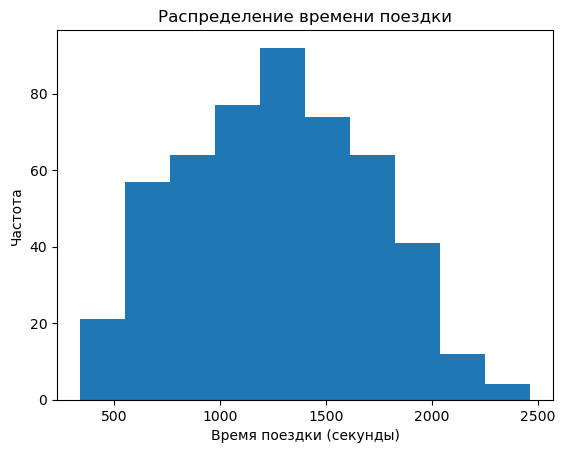

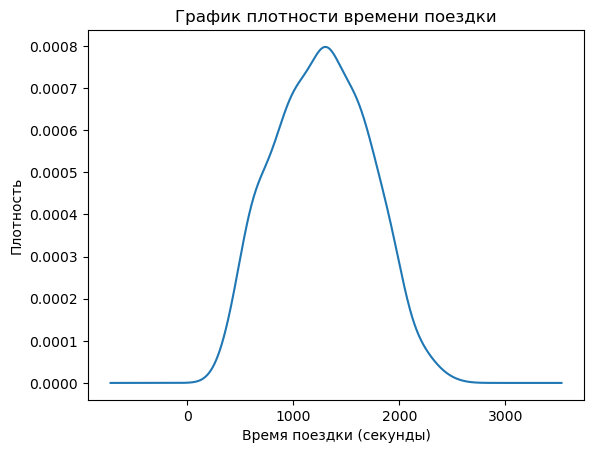

In [21]:
import matplotlib.pyplot as plt

# Создание гистограммы времени поездки
plt.hist(new_df['Mean Travel Time (Seconds)'], bins=10)
plt.xlabel('Время поездки (секунды)')
plt.ylabel('Частота')
plt.title('Распределение времени поездки')
plt.show()

# Создание графика плотности времени поездки
new_df['Mean Travel Time (Seconds)'].plot(kind='density')
plt.xlabel('Время поездки (секунды)')
plt.ylabel('Плотность')
plt.title('График плотности времени поездки')
plt.show()


1. Создаем новые столбцы 'Origin Latitude', 'Origin Longitude', 'Destination Latitude', 'Destination Longitude', которые будут содержать координаты широты и долготы для начальной и конечной точек соответственно.

2. Мы применяем метод apply к столбцам 'Origin Geometry' и 'Destination Geometry', чтобы преобразовать список точек в координаты широты и долготы. Для каждой точки в списке мы используем функцию Point из библиотеки Shapely для создания геометрического объекта и затем извлекаем координаты широты и долготы.

3. Выводим обновленный DataFrame, содержащий столбцы с извлеченными координатами 'Origin Latitude', 'Origin Longitude', 'Destination Latitude', 'Destination Longitude'.

In [22]:
from shapely.geometry import Point

# Создание новых столбцов с координатами широты и долготы для начальной точки
new_df['Origin Latitude'] = new_df['Origin Geometry'].apply(lambda point_list: [Point(point).y for point in point_list])
new_df['Origin Longitude'] = new_df['Origin Geometry'].apply(lambda point_list: [Point(point).x for point in point_list])

# Создание новых столбцов с координатами широты и долготы для конечной точки
new_df['Destination Latitude'] = new_df['Destination Geometry'].apply(lambda point_list: [Point(point).y for point in point_list])
new_df['Destination Longitude'] = new_df['Destination Geometry'].apply(lambda point_list: [Point(point).x for point in point_list])

# Вывод обновленного DataFrame с извлеченными координатами
print(new_df[['Origin Latitude', 'Origin Longitude', 'Destination Latitude', 'Destination Longitude']])


                                       Origin Latitude  \
0    [-33.86874, -33.86868, -33.87084, -33.87088, -...   
1    [-33.86874, -33.86868, -33.87084, -33.87088, -...   
2    [-33.86874, -33.86868, -33.87084, -33.87088, -...   
3    [-33.86874, -33.86868, -33.87084, -33.87088, -...   
4    [-33.86874, -33.86868, -33.87084, -33.87088, -...   
..                                                 ...   
501  [-33.86874, -33.86868, -33.87084, -33.87088, -...   
502  [-33.86874, -33.86868, -33.87084, -33.87088, -...   
503  [-33.86874, -33.86868, -33.87084, -33.87088, -...   
504  [-33.86874, -33.86868, -33.87084, -33.87088, -...   
505  [-33.86874, -33.86868, -33.87084, -33.87088, -...   

                                      Origin Longitude  \
0    [151.20528, 151.20604, 151.20631, 151.20553, 1...   
1    [151.20528, 151.20604, 151.20631, 151.20553, 1...   
2    [151.20528, 151.20604, 151.20631, 151.20553, 1...   
3    [151.20528, 151.20604, 151.20631, 151.20553, 1...   
4    [151.205

In [23]:
new_df = new_df.drop(['Origin Geometry', 'Destination Geometry'], axis=1)


In [24]:
new_df.head()

,Mean Travel Time (Seconds),Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude
0,1833,"[-33.86874, -33.86868, -33.87084, -33.87088, -...","[151.20528, 151.20604, 151.20631, 151.20553, 1...","[-33.75661, -33.75797, -33.75987, -33.76267, -...","[150.98016, 150.98118, 150.9815, 150.98151, 15..."
1,1782,"[-33.86874, -33.86868, -33.87084, -33.87088, -...","[151.20528, 151.20604, 151.20631, 151.20553, 1...","[-33.76267, -33.76256, -33.76287, -33.7624, -3...","[150.98151, 150.98712, 150.99063, 150.99203, 1..."
2,1784,"[-33.86874, -33.86868, -33.87084, -33.87088, -...","[151.20528, 151.20604, 151.20631, 151.20553, 1...","[-33.75916, -33.75809, -33.75655, -33.75567, -...","[150.99015, 150.98964, 150.98956, 150.98972, 1..."
3,1906,"[-33.86874, -33.86868, -33.87084, -33.87088, -...","[151.20528, 151.20604, 151.20631, 151.20553, 1...","[-33.76266, -33.76218, -33.76166, -33.76119, -...","[150.9914, 150.99094, 150.99155, 150.99112, 15..."
4,1974,"[-33.86874, -33.86868, -33.87084, -33.87088, -...","[151.20528, 151.20604, 151.20631, 151.20553, 1...","[-33.7573, -33.75413, -33.7539, -33.75422, -33...","[150.9562, 150.95862, 150.95942, 150.96026, 15..."


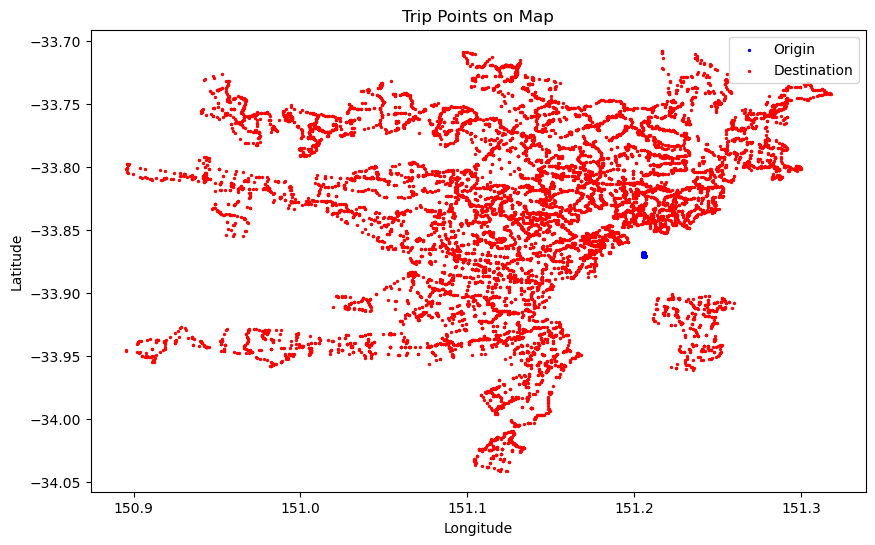

In [25]:
import matplotlib.pyplot as plt

# Создание графика
plt.figure(figsize=(10, 6))

# Отображение точек отправления
origin_latitudes = [lat for coords in new_df['Origin Latitude'] for lat in coords]
origin_longitudes = [lon for coords in new_df['Origin Longitude'] for lon in coords]
plt.scatter(origin_longitudes, origin_latitudes, color='blue', label='Origin', s=2)  # Установка размера точек

# Отображение точек назначения
dest_latitudes = [lat for coords in new_df['Destination Latitude'] for lat in coords]
dest_longitudes = [lon for coords in new_df['Destination Longitude'] for lon in coords]
plt.scatter(dest_longitudes, dest_latitudes, color='red', label='Destination', s=2)  # Установка размера точек

# Настройка внешнего вида карты
plt.title('Trip Points on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Отображение графика
plt.show()


In [26]:
import pandas as pd

# Проверка столбцов на наличие списков
origin_lat_lists = new_df['Origin Latitude'].apply(lambda x: isinstance(x, list))
origin_lon_lists = new_df['Origin Longitude'].apply(lambda x: isinstance(x, list))
dest_lat_lists = new_df['Destination Latitude'].apply(lambda x: isinstance(x, list))
dest_lon_lists = new_df['Destination Longitude'].apply(lambda x: isinstance(x, list))

# Вывод информации о наличии списков в столбцах
print("Столбец 'Origin Latitude' содержит списки:", any(origin_lat_lists))
print("Столбец 'Origin Longitude' содержит списки:", any(origin_lon_lists))
print("Столбец 'Destination Latitude' содержит списки:", any(dest_lat_lists))
print("Столбец 'Destination Longitude' содержит списки:", any(dest_lon_lists))


Столбец 'Origin Latitude' содержит списки: True
Столбец 'Origin Longitude' содержит списки: True
Столбец 'Destination Latitude' содержит списки: True
Столбец 'Destination Longitude' содержит списки: True


In [27]:
import pandas as pd

# Преобразование списков в отдельные значения
new_df['Origin Latitude'] = new_df['Origin Latitude'].apply(lambda x: x[0] if isinstance(x, list) else x)
new_df['Origin Longitude'] = new_df['Origin Longitude'].apply(lambda x: x[0] if isinstance(x, list) else x)
new_df['Destination Latitude'] = new_df['Destination Latitude'].apply(lambda x: x[0] if isinstance(x, list) else x)
new_df['Destination Longitude'] = new_df['Destination Longitude'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Проверка столбцов после преобразования
origin_lat_lists = new_df['Origin Latitude'].apply(lambda x: isinstance(x, list))
origin_lon_lists = new_df['Origin Longitude'].apply(lambda x: isinstance(x, list))
dest_lat_lists = new_df['Destination Latitude'].apply(lambda x: isinstance(x, list))
dest_lon_lists = new_df['Destination Longitude'].apply(lambda x: isinstance(x, list))

# Вывод информации о наличии списков в столбцах после преобразования
print("Столбец 'Origin Latitude' содержит списки:", any(origin_lat_lists))
print("Столбец 'Origin Longitude' содержит списки:", any(origin_lon_lists))
print("Столбец 'Destination Latitude' содержит списки:", any(dest_lat_lists))
print("Столбец 'Destination Longitude' содержит списки:", any(dest_lon_lists))


Столбец 'Origin Latitude' содержит списки: False
Столбец 'Origin Longitude' содержит списки: False
Столбец 'Destination Latitude' содержит списки: False
Столбец 'Destination Longitude' содержит списки: False


Вычисляем расстояние между точками отправления и назначения на основе их координат, используя библиотеку geopy. Результаты вычислений сохраняются в новом столбце "Distance" в датафрейме new_df.

In [28]:
import numpy as np
from geopy.distance import geodesic

# Создание столбца "Distance" в датафрейме с пустыми значениями
new_df['Distance'] = np.nan

# Заполнение столбца "Distance" с помощью цикла
for i, row in new_df.iterrows():
    origin_lat = row['Origin Latitude']
    origin_lon = row['Origin Longitude']
    dest_lat = row['Destination Latitude']
    dest_lon = row['Destination Longitude']
    
    origin_point = (origin_lat, origin_lon)
    dest_point = (dest_lat, dest_lon)
    distance = geodesic(origin_point, dest_point).kilometers
    
    new_df.at[i, 'Distance'] = distance

# Округление столбца "Distance" до 2 знаков после запятой
new_df['Distance'] = new_df['Distance'].round(decimals=2)


In [29]:
new_df.head()

,Mean Travel Time (Seconds),Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Distance
0,1833,-33.86874,151.20528,-33.75661,150.98016,24.27
1,1782,-33.86874,151.20528,-33.76267,150.98151,23.83
2,1784,-33.86874,151.20528,-33.75916,150.99015,23.33
3,1906,-33.86874,151.20528,-33.76266,150.99140,23.03
4,1974,-33.86874,151.20528,-33.75730,150.95620,26.17


In [30]:
new_df['Mean Travel Time (Minutes)'] = new_df['Mean Travel Time (Seconds)'] / 60
new_df['Mean Travel Time (Minutes)'] = new_df['Mean Travel Time (Minutes)'].round(2)


In [31]:
new_df.drop('Mean Travel Time (Seconds)', axis=1, inplace=True)


In [32]:
new_df.head()

,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Distance,Mean Travel Time (Minutes)
0,-33.86874,151.20528,-33.75661,150.98016,24.27,30.55
1,-33.86874,151.20528,-33.76267,150.98151,23.83,29.70
2,-33.86874,151.20528,-33.75916,150.99015,23.33,29.73
3,-33.86874,151.20528,-33.76266,150.99140,23.03,31.77
4,-33.86874,151.20528,-33.75730,150.95620,26.17,32.90


График диаграммы рассеяния позволяет наглядно исследовать взаимосвязь между двумя переменными. Он позволяет увидеть, как изменяется среднее время путешествия в зависимости от расстояния. 

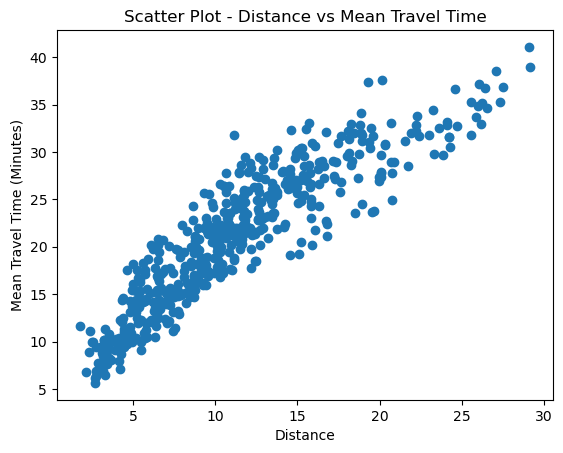

In [33]:
import matplotlib.pyplot as plt

# Создание графика диаграммы рассеяния
plt.scatter(new_df['Distance'], new_df['Mean Travel Time (Minutes)'])

# Настройка осей и заголовка
plt.xlabel('Distance')
plt.ylabel('Mean Travel Time (Minutes)')
plt.title('Scatter Plot - Distance vs Mean Travel Time')

# Отображение графика
plt.show()


In [34]:
new_df['Average speed'] = (new_df['Distance'] / new_df['Mean Travel Time (Minutes)']) * 60
new_df['Average speed'] = new_df['Average speed'].astype(int)


In [35]:
new_df.head()

,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Distance,Mean Travel Time (Minutes),Average speed
0,-33.86874,151.20528,-33.75661,150.98016,24.27,30.55,47
1,-33.86874,151.20528,-33.76267,150.98151,23.83,29.70,48
2,-33.86874,151.20528,-33.75916,150.99015,23.33,29.73,47
3,-33.86874,151.20528,-33.76266,150.99140,23.03,31.77,43
4,-33.86874,151.20528,-33.75730,150.95620,26.17,32.90,47


In [36]:
new_df.describe()

,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Distance,Mean Travel Time (Minutes),Average speed
count,5.060000e+02,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000
mean,-3.386874e+01,1.512053e+02,-33.849562,151.130790,11.307075,21.098617,30.405138
std,2.844984e-14,2.560485e-13,0.066358,0.079635,5.703301,7.306085,7.184685
min,-3.386874e+01,1.512053e+02,-34.041390,150.902530,1.740000,5.630000,8.000000
25%,-3.386874e+01,1.512053e+02,-33.900738,151.087430,6.835000,15.405000,26.000000
50%,-3.386874e+01,1.512053e+02,-33.838470,151.133335,10.470000,21.380000,30.000000
75%,-3.386874e+01,1.512053e+02,-33.801552,151.187453,14.547500,26.522500,34.000000
max,-3.386874e+01,1.512053e+02,-33.709850,151.291450,29.180000,41.080000,49.000000


Эти статистические метрики позволяют получить представление о распределении и характеристиках данных. Например, мы можем видеть, что среднее время путешествия составляет примерно 21 минуту, а среднее расстояние составляет около 11 километров, средняя скорость ("Average speed") составляет около 30.41 км/час

#### На основе анализа данных можно сделать следующие выводы:

* Водители Uber в Sydney выполняют путешествия в среднем на расстояние около 11 километров за примерно 21 минуту.
* Средняя скорость путешествия составляет около 30 км/час, что отражает общую скорость движения в городе.
* Водители Uber в Sydney могут прогнозировать время путешествия на основе расстояния и средней скорости.

Эти выводы могут быть полезны для оптимизации и улучшения услуг Uber в Sydney, например, планирования маршрутов, оценки времени доставки и повышения эффективности системы перевозок.